# Лабораторна робота №3 - Boosting

## Підготовка середовища

1. Імпорти залежностей

In [ ]:
import torch
import random
import numpy as np
import pandas as pd

from src.visualization.plot import plot_estimators_count_to_f1
from src.util.torch_device import resolve_torch_device
from src.model.boost import CustomBoostingClassifier

from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.discriminant_analysis import StandardScaler

2. Встановити сід генератора випадкових чисел

In [2]:
random_seed = 42

random.seed(random_seed)
torch.manual_seed(random_seed)
np.random.seed(random_seed)

3. Завантажити девайс

In [3]:
device = resolve_torch_device()

4. Завантажити датасет

In [4]:
df = pd.read_csv("https://archive.ics.uci.edu/static/public/45/data.csv")
df = df.dropna()

x = df.drop(columns=["num"]).to_numpy()
y = df["num"].to_numpy()

## Навчання SVM.

1. Завантажити та налаштувати модель обраної архітектури

In [5]:
pipe = make_pipeline(
    StandardScaler(),
    SVC(probability=True, kernel="linear", random_state=random_seed),
)

2. Провести навчання моделі

In [6]:
svm_score = cross_val_score(pipe, x, y, scoring="f1_weighted").mean()

## Навчання DecisionTreeClassifier.

1. Завантажити та налаштувати модель обраної архітектури

In [7]:
pipe = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier(random_state=random_seed),
)

2. Провести навчання моделі

In [8]:
decision_tree_score = cross_val_score(pipe, x, y, scoring="f1_weighted").mean()

## Навчання Boosting SVM.

1. Завантажити та налаштувати модель обраної архітектури

In [9]:
pipe = make_pipeline(
    StandardScaler(),
    AdaBoostClassifier(
        estimator=SVC(probability=True, kernel="linear", random_state=random_seed),
        n_estimators=1,
        random_state=random_seed,
        algorithm="SAMME",
    ),
)

2. Провести навчання моделі

In [10]:
param_grid = {
    "adaboostclassifier__n_estimators": [25, 50, 75],
}

search = GridSearchCV(pipe, param_grid, scoring="f1_weighted", verbose=10)

search.fit(x, y)

used_params = [
    it["adaboostclassifier__n_estimators"] for it in search.cv_results_["params"]
]

best_boosting_svm = search.best_estimator_
boosting_svm_score = search.best_score_

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5; 1/3] START adaboostclassifier__n_estimators=25.........................
[CV 1/5; 1/3] END adaboostclassifier__n_estimators=25;, score=0.511 total time=   0.1s
[CV 2/5; 1/3] START adaboostclassifier__n_estimators=25.........................
[CV 2/5; 1/3] END adaboostclassifier__n_estimators=25;, score=0.520 total time=   0.2s
[CV 3/5; 1/3] START adaboostclassifier__n_estimators=25.........................
[CV 3/5; 1/3] END adaboostclassifier__n_estimators=25;, score=0.489 total time=   0.2s
[CV 4/5; 1/3] START adaboostclassifier__n_estimators=25.........................
[CV 4/5; 1/3] END adaboostclassifier__n_estimators=25;, score=0.605 total time=   0.1s
[CV 5/5; 1/3] START adaboostclassifier__n_estimators=25.........................
[CV 5/5; 1/3] END adaboostclassifier__n_estimators=25;, score=0.483 total time=   0.1s
[CV 1/5; 2/3] START adaboostclassifier__n_estimators=50.........................
[CV 1/5; 2/3] END a

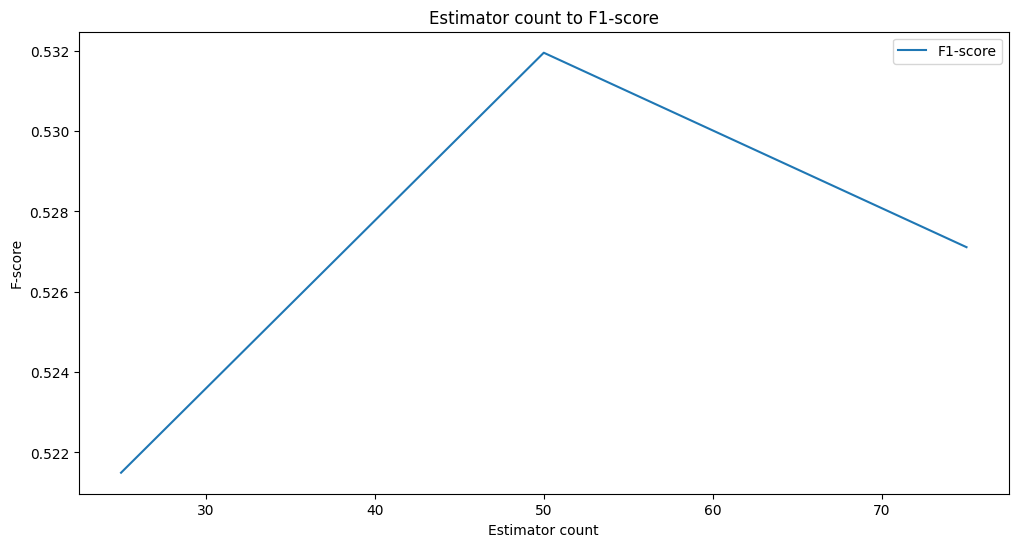

In [11]:
plot_estimators_count_to_f1(used_params, search.cv_results_["mean_test_score"])

## Навчання Boosting Decision Tree.

1. Завантажити та налаштувати модель обраної архітектури

In [12]:
pipe = make_pipeline(
    StandardScaler(),
    AdaBoostClassifier(
        estimator=DecisionTreeClassifier(random_state=random_seed),
        n_estimators=1,
        random_state=random_seed,
        algorithm="SAMME",
    ),
)

2. Провести навчання моделі

In [13]:
param_grid = {
    "adaboostclassifier__n_estimators": [25, 50, 75],
}

search = GridSearchCV(pipe, param_grid, scoring="f1_weighted", verbose=10)

search.fit(x, y)

used_params = [
    it["adaboostclassifier__n_estimators"] for it in search.cv_results_["params"]
]

best_boosting_decision_tree = search.best_estimator_
boosting_decision_tree_score = search.best_score_

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5; 1/3] START adaboostclassifier__n_estimators=25.........................
[CV 1/5; 1/3] END adaboostclassifier__n_estimators=25;, score=0.436 total time=   0.0s
[CV 2/5; 1/3] START adaboostclassifier__n_estimators=25.........................
[CV 2/5; 1/3] END adaboostclassifier__n_estimators=25;, score=0.515 total time=   0.0s
[CV 3/5; 1/3] START adaboostclassifier__n_estimators=25.........................
[CV 3/5; 1/3] END adaboostclassifier__n_estimators=25;, score=0.494 total time=   0.0s
[CV 4/5; 1/3] START adaboostclassifier__n_estimators=25.........................
[CV 4/5; 1/3] END adaboostclassifier__n_estimators=25;, score=0.521 total time=   0.0s
[CV 5/5; 1/3] START adaboostclassifier__n_estimators=25.........................
[CV 5/5; 1/3] END adaboostclassifier__n_estimators=25;, score=0.502 total time=   0.0s
[CV 1/5; 2/3] START adaboostclassifier__n_estimators=50.........................
[CV 1/5; 2/3] END a

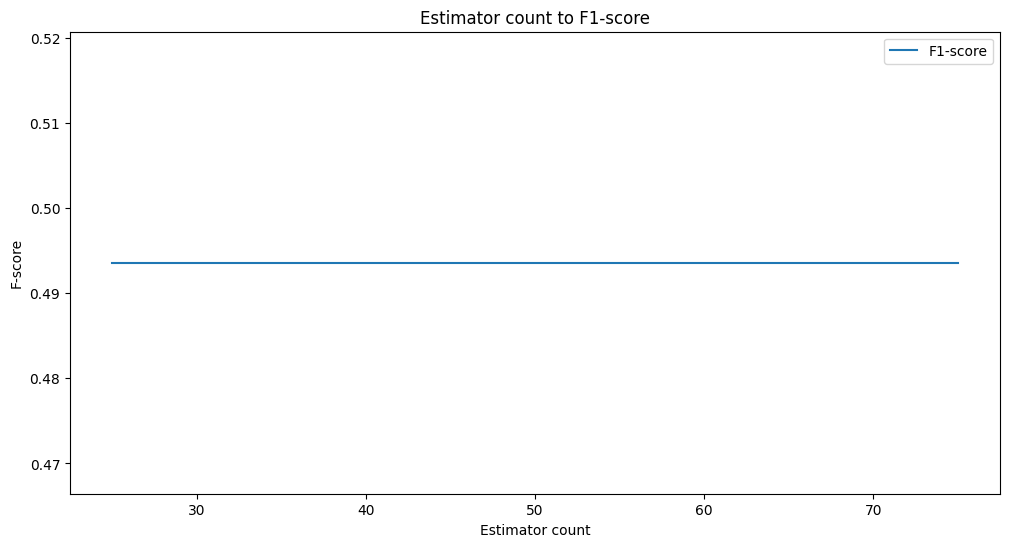

In [14]:
plot_estimators_count_to_f1(used_params, search.cv_results_["mean_test_score"])

## Навчання Boosting SVM +  Decision Tree.

1. Завантажити та налаштувати модель обраної архітектури

In [15]:
estimators = [SVC(random_state=random_seed) for _ in range(25)] + [
    DecisionTreeClassifier(random_state=random_seed) for _ in range(25)
]

pipe = make_pipeline(StandardScaler(), CustomBoostingClassifier(estimators=estimators))

2. Провести навчання моделі

In [16]:
boosting_svm_decision_tree_score = cross_val_score(
    pipe, x, y, scoring="f1_weighted"
).mean()

## Висновки

In [17]:
data = {
    "Модель": ["SVM", "Decision Tree", "Boosting SVM", "Boosting Decision Tree", "Boosting SVM + Decision Tree"],
    "F1 score": [
        svm_score,
        decision_tree_score,
        boosting_svm_score,
        boosting_decision_tree_score,
        boosting_svm_decision_tree_score,
    ],
}

df = pd.DataFrame(data)

df

,Модель,F1 score
0,SVM,0.552193
1,Decision Tree,0.486656
2,Boosting SVM,0.531954
3,Boosting Decision Tree,0.493590
4,Boosting SVM + Decision Tree,0.375090
